# An Analysis of Baltimore Towing Trends
## IST 5520: Data Science w/ Python 
### By: Noah Donnelly, Nana Amoah, Quintin Sargent, Ethan Hisle, Joseph Rae 
#### October 28th, 2021



# 1) Introduction

Scenario: Over the past 12 years in Baltimore there were more than 265,000 instances of towed vehicles. Baltimore kept detailed records including the vehicle make, model, the tow contractor, the location of the vehicle at the time of the tow, the price of the tow, and where the vehicle was stored. Suppose that the City of Baltimore is performing an audit to ensure that their towing practices are unbiased. They are interested in determining if they are unfairly favoring one towing company, if they are unfairly towing specific models and makes of cars, or tow cars from other states more often than others. They hired us, a data science contractor to analyze their data and present the outcome as a neutral party.

Some questions that could be analysed for checking if the city of Baltimore has been biased in towing are:
 - Is the city of Balitmore unfairly favoring one towing company over the other compeititors?
 - Is the city of Balitmore towing a specific make and/or model of a car unfairly more then others?
 - Is the city of Balitmore towing visiting and traveling vistiors disportionally to local residents?
 
 Articles and Reports related to bias and corruption problems within the city of Baltimore:
 - https://foxbaltimore.com/news/local/ig-report-city-towing-contractor-sold-towed-vehicles
 - https://foxbaltimore.com/news/local/in-depth-maryland-leaders-and-corruption
 - https://www.baltimoresun.com/latest/bs-md-ci-officer-guilty-20111208-story.html
 - https://www.baltimoresun.com/maryland/bs-md-towing-history-20110223-story.html

The dataset has met all of the criteria required for the project, as the dataset:
 - It has 39 columns and 265,816 rows so it is large enough to analyze using data science techniques. 
 - The data is not clean. This dataset contains many missing values and the time data will need to be reformatted for ease of   analysis along with many other adjustments. 
 - As far as we have been able to discover, the dataset has not been analyzed by anyone on the internet. The dataset appears to be untouched (this could possibly be due to its restricted access). 

## 1.2) Variables we will use in the analysis

- TowedDateTime (Date, The date and time the car was towed.)
- PickupType (String, The reason the car was towed.)
- VehicleType (String, The type of the car.) 
- VehicleYear (String, The year of the car.)
- VehicleMake (String, The manufacturer of the car.)
- VehicleModel (String, The model of the car.)
- VehicleColor (String, The color of the car.)
- TagState (String, The state the car was registered in.)
- TowCompany (String, The compmany contracted to tow the car.)
- TowCharge (Double, The amount charged by the tower to tow the car.)
- TowedFromLocation (String, Where the car was when it was towed.)
- ReceivingDateTime (Date, The date and time the car was received at the yard.)
- StorageYard (String, The storage yard the car was towed to.)
- StorageLocation (String, The location of the storage yard.)
- HoldDateTime (Date, The date and time the car began to be held.)
- HoldReleasedDateTime (Date, The date and time the car was released.)
- HoldReleasedNotifyDate (Date, The date and time they notify the owner.)
- RemovedFromYardDate (Date, the date and time the car was removed from the yard.) 
- Status (String, The status of the car (released, auctioned, etc.)
- ReleaseDateTime (Date, The date and time the car was released.)
- ReleaseType (String, How the car was picked up/realeased.)
- TotalPaid (Double, The amount of money paid.)

# 2) Data Source and Collection

Data Source and Collection
The dataset is downloadable as a csv file (currently the api is not working, or may require special authorization to download,so we may have to use a web scraper to get the data).
The data sources are: 

 - [ArcGIS Table](https://data.baltimorecity.gov/datasets/93884de333ae43118871ca47624eb31c/explore)
 - [Table Description](https://catalog.data.gov/dataset/towing-3d0dc)
 - [Raw Data](https://www.arcgis.com/home/item.html?id=93884de333ae43118871ca47624eb31c&sublayer=0&sortOrder=desc&sortField=defaultFSOrder#data)


## 2.1) Data Manipulation

In [1]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Towing.csv',sep = ',')
df.sample(10)

c:\users\noah\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,7,15,17,18,20,26,27,28,29,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,HoldDateTime,HoldReleasedDateTime,HoldReleasedNotifyDate,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,ESRI_OID
32649,F508742,2015/12/20 13:35:00+00,Parking Violation,NaN,NaN,SATURN,ION,NaN,1CA2990,MD,...,NaN,NaN,NaN,NaN,NaN,NaN,2015/12/21 14:29:00+00,Transferred to Pulaski Lot,0.0,14656
53870,P194162,2010/03/15 15:54:00+00,Police Action (Misc.),Van,91,Chevrolet,NaN,Maroon,58274M8,MD,...,NaN,NaN,NaN,2010/05/05 00:00:00+00,0.0,Auctioned,2010/05/05 08:00:00+00,Auctioned,0.0,28880
126039,P266376,2013/10/24 12:42:00+00,Scofflaw,Car,01,Volkswagon,Passat,Black,JGS650,MD,...,NaN,NaN,NaN,2013/10/25 00:00:00+00,0.0,Released,2013/10/25 14:12:00+00,Reclaimed by Owner,444.0,11040
162247,P302600,2015/08/30 21:09:00+00,Police Action (Misc.),Car,94,Nissan,Maxima,Tan,9BX3073,MD,...,NaN,NaN,NaN,2015/08/31 00:00:00+00,0.0,Released,2015/08/31 16:43:00+00,Reclaimed by Owner,220.0,67758
241240,P381658,2019/07/12 19:10:00+00,Burns,SUV,04,GMC,Envoy,Black,7DT9884,MD,...,2019/07/12 19:10:00+00,2019/07/25 08:47:00+00,2019/07/25 00:00:00+00,2020/02/04 00:00:00+00,0.0,Released,2020/02/04 14:52:00+00,Junked (No Auction Bid),0.0,100753
178386,P318759,2016/05/26 17:15:00+00,Police Action (Misc.),Car,99,Nissan,Altima,Black,NaN,NaN,...,NaN,NaN,NaN,2016/08/03 00:00:00+00,0.0,Auctioned,2016/08/03 08:00:00+00,Auctioned,0.0,24388
117051,P257383,2013/05/16 10:31:00+00,Impound (Illegal Parking),Car,NaN,Audi,A4,Blue,C20900,VA,...,NaN,NaN,NaN,2013/05/16 00:00:00+00,0.0,"Active, Paid-in-Yard",2013/05/16 15:49:00+00,Reclaimed by Owner,458.0,2052
196135,P336529,2017/03/22 02:10:00+00,Police Action (Arrest of Operator),Car,NaN,Lexus,Ls,Silver,Z79100,MD,...,NaN,NaN,NaN,2017/03/23 00:00:00+00,0.0,Released,2017/03/23 17:06:00+00,Reclaimed by Owner,252.0,42137
57389,P197683,2010/05/14 02:20:00+00,Stolen Recovered,Car,95,Buick,Century,Burgundy,4FHK43,MD,...,NaN,NaN,NaN,2010/05/24 00:00:00+00,1.0,Released,2010/05/24 15:11:00+00,Reclaimed by Owner,130.0,11894
231528,P371935,2018/11/26 19:21:00+00,Police Action (Narcotic),Car,06,Toyota,Solara,Black,NaN,MD,...,2018/11/26 19:21:00+00,2018/11/28 17:10:00+00,2018/11/28 00:00:00+00,2018/12/03 00:00:00+00,0.0,Released,2018/12/03 16:11:00+00,Reclaimed by Owner,340.0,91041


These columns were not very usefull mostly due to the high number of null variables so we dropped them.

In [3]:
dfDropped = df.drop(['PropertyNumber','TagNumber','HowTowed','SlingUsed','DollyUsed','rollBackUsed','pinPulled','pinReplaced',
                     'WheelLift','Stinger','StorageTelephone','TitleRenounciation','TRDateTime','PersonalPropRemoved',
                     'PersonalPropLeftInVehicle','HoldType','StolenVehicleFlag','ESRI_OID'], axis = 1)
dfDropped.sample(10)

,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,...,StorageYard,StorageLocation,HoldDateTime,HoldReleasedDateTime,HoldReleasedNotifyDate,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid
167996,2015/12/02 18:41:00+00,Police Action (Misc.),Car,01,Cadillac,Deville,Silver,NaN,"Frankford Towing, Inc.",130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",NaN,NaN,NaN,2015/12/03 00:00:00+00,Released,2015/12/03 13:58:00+00,Reclaimed by Owner,220.0
36432,2016/06/23 14:38:00+00,Parking Violation,NaN,NaN,CHEVROLET,NaN,NaN,MD,McDels Towing & Recovery,130.0,...,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,NaN,NaN,NaN,NaN,2016/06/23 16:03:00+00,Release to Owner,272.0
243966,2019/09/26 09:03:00+00,Stolen Recovered,SUV,00,Ford,Expedition,White,MD,McDels Enterprise Inc.,130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",NaN,NaN,NaN,2019/10/03 00:00:00+00,Released,2019/10/03 13:35:00+00,Reclaimed by Insurer,235.0
23546,2014/12/17 07:53:00+00,Parking Violation,NaN,15,HONDA,FIT,NaN,MD,City,140.0,...,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,NaN,NaN,NaN,NaN,2014/12/17 10:05:00+00,Release to Owner,282.0
156187,2015/05/22 13:00:00+00,Scofflaw,Car,08,Toyota,Corolla,Black,PA,City,130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",NaN,NaN,NaN,2015/12/23 00:00:00+00,Auctioned,2015/12/23 08:00:00+00,Auctioned,0.0
44665,2017/06/28 16:14:00+00,Parking Violation,NaN,NaN,CHEVROLET,NaN,NaN,MD,McDels Towing & Recovery,130.0,...,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,NaN,NaN,NaN,NaN,2017/06/28 17:54:00+00,Release to Owner,272.0
133192,2014/03/14 07:24:00+00,Scofflaw,Car,13,Nissan,Altima,Tan,MD,City,130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",NaN,NaN,NaN,2014/03/20 00:00:00+00,Released,2014/03/20 13:25:00+00,Reclaimed by Owner,421.0
163470,2015/09/19 12:00:00+00,Scofflaw,Car,95,Mercedes,C280,Gold,VA,City,130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",NaN,NaN,NaN,2015/10/31 00:00:00+00,Released,2015/10/31 11:41:00+00,Reclaimed by Owner,948.0
25623,2015/03/10 16:49:00+00,Parking Violation,NaN,NaN,HONDA,NaN,NaN,MD,McDels Towing & Recovery,130.0,...,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,NaN,NaN,NaN,NaN,2015/03/10 18:29:00+00,Release to Owner,272.0
61543,2010/07/24 23:20:00+00,Burns,Pick-up Truck,92,Chevrolet,Silverado,Burgundy,NaN,Frankford Towing,130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/07/24 23:20:00+00,2010/07/28 12:21:00+00,2010/07/28 00:00:00+00,NaN,Auctioned,2010/09/22 08:00:00+00,Auctioned,0.0


## 2.2) Changing column types

change year to numeric

In [4]:
dfDropped["VehicleYear"] = pd.to_numeric(df["VehicleYear"].str.replace("[^0-9.]",""))
def custom_year(year):
    if pd.isna(year):
        return np.nan
    if year <10:
        return float("200"+str(year))
    if year<=21:
        return float("20"+str(year))
    if year>=21 and year<=1900:
        return float("19"+str(year))
    else:
        return year
        
dfDropped['VehicleYear'] = dfDropped.apply(lambda x: custom_year(x['VehicleYear']),axis=1)

C:\Users\Noah\AppData\Local\Temp/ipykernel_25020/799569031.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfDropped["VehicleYear"] = pd.to_numeric(df["VehicleYear"].str.replace("[^0-9.]",""))


In [5]:
dfDropped.sample(5)

,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,...,StorageYard,StorageLocation,HoldDateTime,HoldReleasedDateTime,HoldReleasedNotifyDate,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid
12573,2014/01/24 16:45:00+00,Parking Violation,NaN,NaN,TOYOTA,NaN,NaN,MD,Jim Elliotts Towing,140.0,...,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,NaN,NaN,NaN,NaN,2014/01/24 18:18:00+00,Release to Owner,282.0
171603,2016/02/07 00:54:00+00,Accident (Owner/Operator Hospitalized),SUV,NaN,GMC,NaN,Red,MD,McDels Enterprise Inc.,130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",NaN,NaN,NaN,2016/02/23 00:00:00+00,Released,2016/02/23 11:45:00+00,Reclaimed by Insurer,430.0
46587,2019/04/03 16:43:00+00,Parking Violation,NaN,2015.0,NISSAN,ROGUE,NaN,MD,McDels Towing & Recovery,130.0,...,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,NaN,NaN,NaN,NaN,2019/04/04 11:28:00+00,Release to Owner,272.0
3363,2013/02/28 16:22:00+00,Parking Violation,NaN,2005.0,MAZDA,TIRBUTE,NaN,MD,Frankford Towing,140.0,...,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,NaN,NaN,NaN,NaN,2013/03/01 07:56:00+00,Release to Owner,282.0
152554,2015/03/11 11:44:00+00,Stolen Recovered,Car,2012.0,Nissan,Rogue,Grey,MD,McDels Enterprise Inc.,130.0,...,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",NaN,NaN,NaN,2015/03/13 00:00:00+00,Released,2015/03/13 13:11:00+00,Reclaimed by Insurer,130.0


## 2.3) Dealing With Null Values

In [6]:
#finds the total number of columns with null values
sum([True for idx,row in dfDropped.iterrows() if any(row.isnull())])

252991

Maybe dropping columns with a lot of NaNs will help.

In [7]:
dfDropped = dfDropped.drop(["HoldDateTime","HoldReleasedDateTime","HoldReleasedNotifyDate"],axis=1)

For less important catigorical variables a unknown type could be added.

In [8]:
def addUnknown(thing):
    if pd.isna(thing):
        return "Unknown"
    else:
        return thing
toChange = ["PickupType","VehicleType","VehicleMake","VehicleModel","VehicleColor","Status","ReleaseType"]
for col in toChange:
    dfDropped[col] = dfDropped.apply(lambda x: addUnknown(x[col]),axis=1)

In [9]:
dfDropped.sample(2)

,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,TowedFromLocation,ReceivingDateTime,StorageYard,StorageLocation,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid
197573,2017/04/14 16:00:00+00,Abandoned (Towed by City),SUV,NaN,Nissan,Murano,Silver,MD,City,130.0,5600 Chinquapin Parkway,2017/04/14 16:00:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2017/08/30 00:00:00+00,Auctioned,2017/08/30 08:00:00+00,Auctioned,0.0
40631,2017/01/09 16:35:00+00,Parking Violation,Unknown,2005.0,NISSAN,MAXIMA,Unknown,MD,McDels Towing & Recovery,130.0,1200 NORTH CHARLES ST,2017/01/09 16:54:00+00,Fallsway Impound Lot,"410 Fallsway Baltimore, Maryland 21202",NaN,Unknown,2017/01/10 15:57:00+00,Release to Owner,272.0


In [10]:
sum([True for idx,row in dfDropped.iterrows() if any(row.isnull())])

134782

Drop The remaining rows with NaN

In [11]:
dfDropped = dfDropped.dropna()

In [12]:
dfDropped.sample(10)

,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,TowedFromLocation,ReceivingDateTime,StorageYard,StorageLocation,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid
65191,2010/09/28 10:28:00+00,Accident (Owner/Operator Hospitalized),Car,2007.0,Kia,0PTIMA,Grey,MD,Bermans Towing,140.0,6100 Parks Hghts Ave,2010/09/28 10:28:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/10/09 00:00:00+00,Released,2010/10/09 12:12:00+00,Reclaimed by Owner,380.0
130999,2014/01/30 03:00:00+00,Police Action (Arrest of Operator),Car,2012.0,Mazda,3,Gray,MD,Greenwood Towing,130.0,1800 Walbrook Ave,2014/01/30 03:00:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2014/02/03 00:00:00+00,Released,2014/02/03 13:52:00+00,Reclaimed by Insurer,265.0
52194,2010/02/05 15:11:00+00,Accident (Owner/Operator Hospitalized),Car,2005.0,Chrysler,300,Blue,MD,Bermans Towing,140.0,0 Coldspring Lane,2010/02/05 15:11:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/02/16 00:00:00+00,Released,2010/02/16 10:06:00+00,Reclaimed by Insurer,350.0
173160,2016/03/02 23:25:00+00,Accident,Car,2005.0,Honda,Civic,Tan,MD,Greenwood Towing,130.0,1200 N Calvert St,2016/03/02 23:25:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2016/03/04 00:00:00+00,Released,2016/03/04 12:56:00+00,Reclaimed by Insurer,220.0
131566,2014/02/08 19:30:00+00,Police Action (Misc.),Van,2006.0,Chevrolet,Hhr,Black,MD,McDels Enterprise Inc.,130.0,1600 Roland Heights Ave,2014/02/08 19:30:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2014/02/12 00:00:00+00,Released,2014/02/12 15:27:00+00,Reclaimed by Insurer,250.0
134499,2014/04/07 15:03:00+00,Police Action (Narcotic),Car,2011.0,Nissan,Sentra,White,MD,"Frankford Towing, Inc.",130.0,1500 E Coldspring Ln,2014/04/07 15:03:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2014/04/08 00:00:00+00,Released,2014/04/08 13:48:00+00,Reclaimed by Owner,220.0
245518,2019/11/03 18:09:00+00,Police Action (Misc.),Car,2007.0,Bmw,I345,Grey,MD,"Frankford Towing Associates, LLC",130.0,4400 Arizona Ave,2019/11/03 18:09:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2019/11/06 00:00:00+00,Released,2019/11/06 11:58:00+00,Reclaimed by Owner,235.0
169617,2015/12/31 04:36:00+00,Accident (Owner/Operator Hospitalized),Car,2004.0,Chevrolet,Malibu,Black,KY,McDels Enterprise Inc.,230.0,0 I-83 @ E. Preston St,2015/12/31 04:36:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2018/12/05 00:00:00+00,Auctioned (Not Released),2018/12/05 08:00:00+00,Auctioned,0.0
65896,2010/10/12 03:40:00+00,Police Action (Arrest of Operator),Car,1997.0,Ford,Taurus,Green,MD,Bermans Towing,140.0,4800 Granada Ave,2010/10/12 03:40:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/10/13 00:00:00+00,Released,2010/10/13 11:54:00+00,Reclaimed by Owner,230.0
118689,2013/06/14 16:15:00+00,Accident,SUV,2004.0,Honda,CrV,Burgundy,VA,Greenwood Towing,130.0,3701 Georgetown Ave,2013/06/14 16:15:00+00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2013/06/20 00:00:00+00,Released,2013/06/20 16:24:00+00,Reclaimed by Insurer,265.0


## 2.4) Dealing With Time

In [13]:
from datetime import datetime, timedelta

In [14]:
dfDropped["ReceivingDateTime"] = pd.to_datetime(dfDropped["ReceivingDateTime"], format='%Y/%m/%d %H:%M')
dfDropped["ReleaseDateTime"] = pd.to_datetime(dfDropped["ReleaseDateTime"], format='%Y/%m/%d %H:%M')

In [15]:
dfDropped["ReceivingDateTime"].mean()
dfDropped["ReleaseDateTime"].mean()

Timestamp('2014-03-05 11:46:17.499180032+0000', tz='UTC')

In [16]:
#Calculate The Amount of Time from Tow to Release:
dfDropped["ReceivedToRelease"] = dfDropped["ReleaseDateTime"]-dfDropped["ReceivingDateTime"]
dfDropped["ReceivedToRelease"].mean()

Timedelta('32 days 02:38:01.988695738')

In [17]:
def calculate_days(time):
    if time.days > 0:
        return time.days

dfDropped['DaysTillReleased'] = dfDropped['ReceivedToRelease'].apply(lambda x: calculate_days(x))

## 2.5) Detecting Outliers

In [18]:
dfDropped.describe()

,VehicleYear,TowCharge,TotalPaid,ReceivedToRelease,DaysTillReleased
count,131101.000000,131101.000000,131101.000000,131101,110718.000000
mean,2002.990099,137.273254,279.315185,32 days 02:38:01.988695738,37.428051
std,6.049896,389.331612,272.652435,115 days 08:23:17.900747438,124.139011
min,1927.000000,0.000000,0.000000,-3593 days +21:45:00,1.000000
25%,1999.000000,130.000000,130.000000,1 days 17:24:00,2.000000
50%,2003.000000,130.000000,230.000000,4 days 21:48:00,6.000000
75%,2007.000000,130.000000,325.000000,24 days 13:28:00,36.000000
max,2020.000000,140000.000000,6794.000000,3368 days 04:50:00,3368.000000


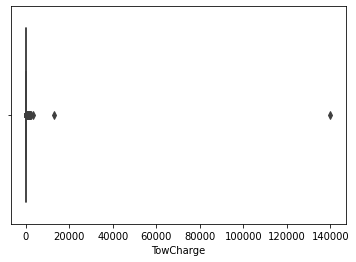

In [19]:
#Detecting outliers among the TowCharge column

boxplot1 = sns.boxplot(x=dfDropped["TowCharge"])

In [20]:
# Calculate the first quantile
first_quantile = dfDropped['TowCharge'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['TowCharge'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
TowChargeOut = pd.concat([dfDropped[dfDropped['TowCharge']<first_quantile-1.5*IQR],
dfDropped[dfDropped['TowCharge']>third_quantile+1.5*IQR]])

print(len(TowChargeOut))
TowChargeOut.sample(5)

31054


,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,...,ReceivingDateTime,StorageYard,StorageLocation,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid,ReceivedToRelease,DaysTillReleased
171867,2016/02/11 13:39:00+00,Abandoned (Towed by City),SUV,2000.0,Jeep,Cherokee,Blue,MD,City,220.0,...,2016-02-11 13:39:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2016/04/13 00:00:00+00,Auctioned,2016-04-13 08:00:00+00:00,Auctioned,0.0,61 days 18:21:00,61.0
61858,2010/07/30 16:16:00+00,Accident,Car,2005.0,Dodge,Neon,Red,MD,Cherryhill Towing Service,140.0,...,2010-07-30 16:16:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/08/03 00:00:00+00,Released,2010-08-03 15:42:00+00:00,Reclaimed by Insurer,245.0,3 days 23:26:00,3.0
90951,2012/01/22 11:22:00+00,Scofflaw,SUV,2007.0,Lincoln,Navigator,Purple,MD,Cherryhill Towing Service,140.0,...,2012-01-22 11:22:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2012/01/31 00:00:00+00,Released,2012-01-31 15:15:00+00:00,Reclaimed by Lien Holder,855.0,9 days 03:53:00,9.0
88015,2011/11/24 10:24:00+00,Police Action (Misc.),Car,2004.0,Mercury,Sable,Tan,MD,Bermans Towing,140.0,...,2011-11-24 10:24:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2012/01/11 00:00:00+00,Auctioned,2012-01-11 08:00:00+00:00,Auctioned,0.0,47 days 21:36:00,47.0
137530,2014/05/30 20:06:00+00,Stolen Recovered,Car,2002.0,Mercedes,ML500,Blk,MD,Universal Towing LLC,255.0,...,2014-05-30 20:06:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2014/06/09 00:00:00+00,Released,2014-06-09 09:56:00+00:00,Reclaimed by Owner,375.0,9 days 13:50:00,9.0


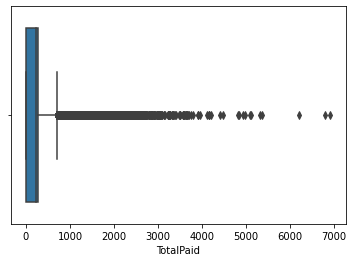

In [21]:
#Detecting outliers among the TotalPaid column
boxplot2 = sns.boxplot(x=df["TotalPaid"])

In [22]:
# Calculate the first quantile
first_quantile = dfDropped['TotalPaid'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['TotalPaid'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
TotalPaidOut = pd.concat([dfDropped[dfDropped['TotalPaid']<first_quantile-1.5*IQR],
dfDropped[dfDropped['TotalPaid']>third_quantile+1.5*IQR]])

print(len(TotalPaidOut))
TotalPaidOut.sample(5)

10806


,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,...,ReceivingDateTime,StorageYard,StorageLocation,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid,ReceivedToRelease,DaysTillReleased
155907,2015/05/16 17:57:00+00,Abandoned (Towed by City),Car,2006.0,Chevrolet,Monte Carlo,Black,NC,City,130.0,...,2015-05-16 17:57:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2015/06/06 00:00:00+00,Released,2015-06-06 14:30:00+00:00,Reclaimed by Lien Holder,807.0,20 days 20:33:00,20.0
108067,2012/11/25 11:45:00+00,Scofflaw,SUV,1999.0,Lincoln,Navigator,Burgundy,MD,City,130.0,...,2012-11-25 11:45:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2012/12/06 00:00:00+00,Released,2012-12-06 11:17:00+00:00,Reclaimed by Owner,755.0,10 days 23:32:00,10.0
101437,2012/08/01 10:02:00+00,Scofflaw,Car,1998.0,Buick,Park Avenue,Silver,MD,City,140.0,...,2012-08-01 10:02:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2012/08/06 00:00:00+00,Released,2012-08-06 16:06:00+00:00,Reclaimed by Owner,650.0,5 days 06:04:00,5.0
169034,2015/12/19 22:00:00+00,Police Action (Misc.),Car,2002.0,Infiniti,I35,Blue,MD,"Frankford Towing, Inc.",130.0,...,2015-12-19 22:00:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2015/12/21 00:00:00+00,Released,2015-12-21 12:04:00+00:00,Reclaimed by Owner,722.0,1 days 14:04:00,1.0
240474,2019/06/20 08:50:00+00,Impound (Illegal Parking),Pick-up Truck,2009.0,Dodge,RAM PICKUP 1500,Red,MD,Fallsway,140.0,...,2019-06-20 08:50:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2019/10/23 00:00:00+00,Released,2019-10-23 13:44:00+00:00,Reclaimed by Lien Holder,2301.0,125 days 04:54:00,125.0


Find outliers in year

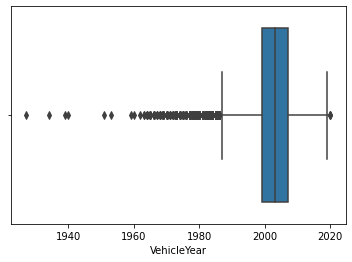

In [23]:
boxplot2 = sns.boxplot(x= dfDropped["VehicleYear"])

In [24]:
# Calculate the first quantile
first_quantile = dfDropped['VehicleYear'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['VehicleYear'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
YearOut = pd.concat([dfDropped[dfDropped['VehicleYear']<first_quantile-1.5*IQR],
dfDropped[dfDropped['VehicleYear']>third_quantile+1.5*IQR]])

print(len(YearOut))
YearOut.sample(5)

810


,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,...,ReceivingDateTime,StorageYard,StorageLocation,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid,ReceivedToRelease,DaysTillReleased
157122,2015/06/09 14:56:00+00,Burns,Car,1979.0,Volkswagen,Bettle,Maroon,CA,McDels Enterprise Inc.,130.0,...,2015-06-09 14:56:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2015/08/05 00:00:00+00,Auctioned (Not Released),2015-08-05 08:00:00+00:00,Auctioned,0.0,56 days 17:04:00,56.0
100607,2012/07/17 13:17:00+00,Abandoned (Towed by City),Boat,1973.0,Cruisers,Unknown,White/Grn,MD,City,130.0,...,2012-07-17 13:17:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2016/09/21 00:00:00+00,Active,2016-09-21 12:57:00+00:00,Destroyed (No VIN),0.0,1526 days 23:40:00,1526.0
66384,2010/10/21 10:51:00+00,Scofflaw,Pick-up Truck,1982.0,Chevrolet,Silverado,Red,MD,City,140.0,...,2010-10-21 10:51:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/12/01 00:00:00+00,Auctioned,2010-12-01 08:00:00+00:00,Auctioned,0.0,40 days 21:09:00,40.0
161998,2015/08/27 10:50:00+00,Abandoned (Towed by City),Pick-up Truck,1979.0,Ford,F-350,White/Grn,PA,City,130.0,...,2015-08-27 10:50:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2015/12/09 00:00:00+00,Auctioned (Not Released),2015-12-09 08:00:00+00:00,Auctioned,0.0,103 days 21:10:00,103.0
179800,2016/06/17 22:25:00+00,Abandoned (Towed by City),Recreational Vehicle (Motor Home/Trailer),1976.0,Sport Coach,29sb,White,MD,Universal Towing LLC,305.0,...,2016-06-17 22:25:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2017/06/07 00:00:00+00,Auctioned,2017-06-07 08:00:00+00:00,Auctioned,0.0,354 days 09:35:00,354.0


Drop all the outliers

In [25]:
dfDropped = dfDropped.drop(TowChargeOut.index, errors='ignore')
dfDropped = dfDropped.drop(TotalPaidOut.index, errors='ignore')
dfDropped = dfDropped.drop(YearOut.index, errors='ignore')

In [26]:
dfDropped

,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagState,TowCompany,TowCharge,...,ReceivingDateTime,StorageYard,StorageLocation,RemovedFromYardDate,Status,ReleaseDateTime,ReleaseType,TotalPaid,ReceivedToRelease,DaysTillReleased
50215,2010/01/01 00:30:00+00,Police Action (Narcotic),Car,2003.0,Acura,3.2 TL,Blue,MD,Aarons Automotive Services,130.0,...,2010-01-01 00:30:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/06/03 00:00:00+00,Released,2010-06-03 12:25:00+00:00,Administrative No Charge,0.0,153 days 11:55:00,153.0
50216,2010/01/01 00:02:00+00,ACCIDENT,Taxi,2000.0,Ford,Crown Victoria,Grn/Wht,MD,Frankford Towing,130.0,...,2010-01-01 00:02:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/01/09 00:00:00+00,Released,2010-01-09 11:16:00+00:00,Reclaimed by Owner,265.0,8 days 11:14:00,8.0
50218,2010/01/01 01:26:00+00,Accident,Car,1998.0,Ford,Escort,Black,MD,Eastern Exxon Servicecenter,130.0,...,2010-01-01 01:26:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/01/04 00:00:00+00,Released,2010-01-04 16:45:00+00:00,Reclaimed by Owner,235.0,3 days 15:19:00,3.0
50224,2010/01/01 03:15:00+00,Accident,SUV,2002.0,Mazda,Tribute,Maroon,MD,Aarons Automotive Services,130.0,...,2010-01-01 03:15:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/01/05 00:00:00+00,Released,2010-01-05 11:52:00+00:00,Reclaimed by Insurer,250.0,4 days 08:37:00,4.0
50225,2010/01/01 03:45:00+00,Police Action (Misc.),Car,1998.0,Buick,Ultra,Black,MD,Frankford Towing,130.0,...,2010-01-01 03:45:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2010/01/02 00:00:00+00,Released,2010-01-02 09:14:00+00:00,Reclaimed by Owner,220.0,1 days 05:29:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245755,2019/11/07 18:05:00+00,Abandoned (Towed by City),Car,2004.0,Chevrolet,Impala,White,MD,City,130.0,...,2019-11-07 18:05:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2020/01/15 00:00:00+00,Auctioned,2020-01-15 08:00:00+00:00,Auctioned,0.0,68 days 13:55:00,68.0
245756,2019/11/07 19:09:00+00,Accident (Owner/Operator Hospitalized),Car,2001.0,Lincoln,Town Country,Black,MD,McDels Enterprise Inc.,130.0,...,2019-11-07 19:09:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2019/11/09 00:00:00+00,Released,2019-11-09 16:27:00+00:00,Reclaimed by Owner,220.0,1 days 21:18:00,1.0
245757,2019/11/07 19:18:00+00,Accident (Owner/Operator Hospitalized),Van,2012.0,Ford,Transit Connect,White,MD,McDels Enterprise Inc.,130.0,...,2019-11-07 19:18:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2019/11/12 00:00:00+00,Released,2019-11-12 12:47:00+00:00,Reclaimed by Owner,340.0,4 days 17:29:00,4.0
245758,2019/11/07 19:20:00+00,Police Action (Misc.),SUV,2007.0,Pontiac,Torrent,Gold,MD,McDels Enterprise Inc.,130.0,...,2019-11-07 19:20:00+00:00,Pulaski,"6700 Pulaski Highway Baltimore, Maryland 21237",2019/11/20 00:00:00+00,Released,2019-11-20 15:23:00+00:00,Reclaimed by Insurer,492.0,12 days 20:03:00,12.0


# 3) Data Exploration

In [27]:
dfDropped.describe()

,VehicleYear,TowCharge,TotalPaid,ReceivedToRelease,DaysTillReleased
count,90927.000000,90927.0,90927.000000,90927,77052.000000
mean,2003.530458,130.0,215.956300,33 days 21:45:19.020312998,39.433473
std,5.820971,0.0,148.434276,111 days 02:06:41.517091192,118.929779
min,1987.000000,130.0,0.000000,-3593 days +21:45:00,1.000000
25%,2000.000000,130.0,130.000000,1 days 17:58:00,2.000000
50%,2003.000000,130.0,220.000000,4 days 22:26:00,6.000000
75%,2007.000000,130.0,290.000000,26 days 12:15:00,41.000000
max,2019.000000,130.0,617.000000,3368 days 04:50:00,3368.000000


In [28]:
dfDropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90927 entries, 50215 to 245759
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   TowedDateTime        90927 non-null  object             
 1   PickupType           90927 non-null  object             
 2   VehicleType          90927 non-null  object             
 3   VehicleYear          90927 non-null  float64            
 4   VehicleMake          90927 non-null  object             
 5   VehicleModel         90927 non-null  object             
 6   VehicleColor         90927 non-null  object             
 7   TagState             90927 non-null  object             
 8   TowCompany           90927 non-null  object             
 9   TowCharge            90927 non-null  float64            
 10  TowedFromLocation    90927 non-null  object             
 11  ReceivingDateTime    90927 non-null  datetime64[ns, UTC]
 12  StorageYard  

## 3.1) Tow Companys

All the contractors the city has used to tow cars:

In [29]:
dfDropped['TowCompany'].unique()

array(['Aarons Automotive Services', 'Frankford Towing',
       'Eastern Exxon Servicecenter', 'Jim Elliotts Towing',
       'Mels Towing & Service Center. Inc.', 'Bermans Towing', 'City',
       'Autobarn', 'McDels Towing & Recovery',
       'Cherryhill Towing Service', 'Fallsway',
       'Teds Towing Service, Inc.', 'Frankford Towing, Inc.',
       'Frankford Towing, LLC', 'Frankford Towing Associates, LLC',
       'Universal Towing LLC', 'Berman`s Towing 4. LLC',
       'Berman`s Towing 2, LLC', 'Berman`s Towing 1, LLC',
       'Greenwood Towing', 'McDels Enterprise Inc.',
       'Jim Elliotts Towing (2)', 'Frankford Towing Service, Llc'],
      dtype=object)

As you can see, there are some of the same contractors that are entered in mulitple times with different numbers

Here is a list with each contractor and a count of how many times each contractor was used.

In [30]:
pd.crosstab(index=dfDropped['TowCompany'],columns="count")

col_0,count
TowCompany,
Aarons Automotive Services,4251
Autobarn,7
"Berman`s Towing 1, LLC",176
"Berman`s Towing 2, LLC",490
Berman`s Towing 4. LLC,869
Bermans Towing,166
Cherryhill Towing Service,12
City,15956
Eastern Exxon Servicecenter,672


Now we will calculate what frequency each tow company was chosen.

In [31]:
pd.crosstab(index=dfDropped['TowCompany'],columns="Percent").sum()

col_0
Percent    90927
dtype: int64

In [32]:
pd.crosstab(index=dfDropped['TowCompany'],columns="Percent")/pd.crosstab(index=dfDropped['TowCompany'],columns="Percent").sum()

col_0,Percent
TowCompany,
Aarons Automotive Services,0.046752
Autobarn,0.000077
"Berman`s Towing 1, LLC",0.001936
"Berman`s Towing 2, LLC",0.005389
Berman`s Towing 4. LLC,0.009557
Bermans Towing,0.001826
Cherryhill Towing Service,0.000132
City,0.175481
Eastern Exxon Servicecenter,0.007391


Contingency table of how each tow company charged to use their services:

In [33]:
pd.crosstab(dfDropped['TowCharge'], dfDropped['TowCompany'], margins=False)

TowCompany,Aarons Automotive Services,Autobarn,"Berman`s Towing 1, LLC","Berman`s Towing 2, LLC",Berman`s Towing 4. LLC,Bermans Towing,Cherryhill Towing Service,City,Eastern Exxon Servicecenter,Fallsway,...,"Frankford Towing, Inc.","Frankford Towing, LLC",Greenwood Towing,Jim Elliotts Towing,Jim Elliotts Towing (2),McDels Enterprise Inc.,McDels Towing & Recovery,Mels Towing & Service Center. Inc.,"Teds Towing Service, Inc.",Universal Towing LLC
TowCharge,,,,,,,,,,,,,,,,,,,,,
130.0,4251,7,176,490,869,166,12,15956,672,2933,...,16216,2130,6229,1436,2423,10373,804,1524,546,11509


As you can see, All instances of towing where charged 1 flat rate of $130.00

Lets see if there was a preference over which company to choose to tow compared to what instance was cited for each towing.

In [34]:
dfDropped['PickupType'].unique()

array(['Police Action (Narcotic)', 'ACCIDENT ', 'Accident',
       'Police Action (Misc.) ', 'Burns',
       'Accident (Owner/Operator Hospitalized)',
       'Police Action (Arrest of Operator)', 'Police Action',
       'Stolen Recovered', 'Abandoned (Towed by City)', 'Scofflaw',
       'Impound (Illegal Parking)', 'Commercial Vehicle Restriction',
       'Impound/Scofflaw', 'Relocate',
       'Police Action (Serial Number Violation)',
       'Accident (Death of Operator)',
       'Stolen Recovered (Car Jacking Victim)', 'STOLEN POLICE HOLD',
       'Abandoned (Towed by Private Tower)',
       'Police Action (Victim of Crime)', 'street cleaning', 'misc holds',
       'Police Action (Death of Operator)', 'Unknown', 'Disabled',
       'Remove Abandoned Vehicles Everywhere (Voluntary)'], dtype=object)

In [35]:
pd.crosstab(index=dfDropped['PickupType'],columns="count")

col_0,count
PickupType,
ACCIDENT,264
Abandoned (Towed by City),5554
Abandoned (Towed by Private Tower),662
Accident,15402
Accident (Death of Operator),52
Accident (Owner/Operator Hospitalized),8255
Burns,1091
Commercial Vehicle Restriction,8
Disabled,1


In [36]:
pd.crosstab(dfDropped['PickupType'], dfDropped['TowCompany'], margins=False)

TowCompany,Aarons Automotive Services,Autobarn,"Berman`s Towing 1, LLC","Berman`s Towing 2, LLC",Berman`s Towing 4. LLC,Bermans Towing,Cherryhill Towing Service,City,Eastern Exxon Servicecenter,Fallsway,...,"Frankford Towing, Inc.","Frankford Towing, LLC",Greenwood Towing,Jim Elliotts Towing,Jim Elliotts Towing (2),McDels Enterprise Inc.,McDels Towing & Recovery,Mels Towing & Service Center. Inc.,"Teds Towing Service, Inc.",Universal Towing LLC
PickupType,,,,,,,,,,,,,,,,,,,,,
ACCIDENT,10,0,0,2,1,0,0,7,6,0,...,72,15,16,2,5,23,0,8,2,42
Abandoned (Towed by City),2,0,0,2,12,0,0,5424,1,4,...,22,2,10,1,9,23,3,1,1,23
Abandoned (Towed by Private Tower),4,0,0,0,1,2,0,10,4,0,...,65,12,13,0,158,107,0,0,1,256
Accident,926,0,27,56,155,28,2,74,199,1,...,3659,559,1403,242,456,2279,191,309,127,1790
Accident (Death of Operator),7,0,0,0,2,0,0,1,0,0,...,10,2,1,0,3,11,0,2,1,4
Accident (Owner/Operator Hospitalized),410,0,15,44,76,13,0,38,75,0,...,1799,292,758,158,312,1468,109,187,78,1006
Burns,71,0,3,10,6,3,1,22,9,0,...,245,26,81,28,53,173,12,22,9,164
Commercial Vehicle Restriction,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,1,0,0,1,0
Disabled,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, some towing companys where chosen very regularly for some kinds of actions, such as Aaron's Automotive Service and Frankford Towing being chosen for accidents, and other companys such as Mel Del's Towing and Recovery and Universal Towing being used for recovering stolen vehicles.

## 3.2) Vehicle Year

We can create a contigency table to show how many cars where towed by each year the car was made

In [37]:
pd.crosstab(index=dfDropped['VehicleYear'],columns="count")

col_0,count
VehicleYear,
1987.0,146
1988.0,189
1989.0,271
1990.0,376
1991.0,483
1992.0,743
1993.0,1003
1994.0,1532
1995.0,2079


## 3.3) Vilion plot of TotalPaid

Here we can make a vilion plot to show the distribution of charges and how frequently each total amount was charged

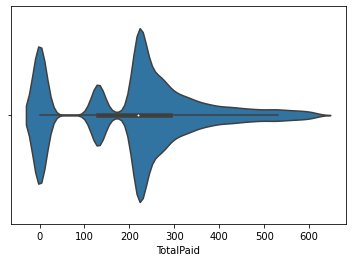

In [38]:
ax = sns.violinplot(x=dfDropped["TotalPaid"])

## 3.4) Barplot of ReleaseType

Here we can make a barplot of the value counts for each type of release and how frequent each release type was with cars.

<AxesSubplot:>

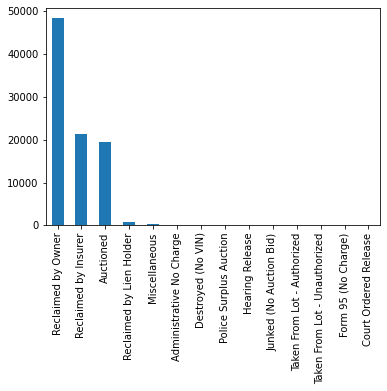

In [39]:
dfDropped['ReleaseType'].value_counts().plot(kind='bar')

## 3.5) Barplot of Time spent impounded vs TotalPaid

Here we can make a barplot for the time each car spent impounded vs how much the owner had to paid when they got their car out

<AxesSubplot:xlabel='DaysTillReleased', ylabel='TotalPaid'>

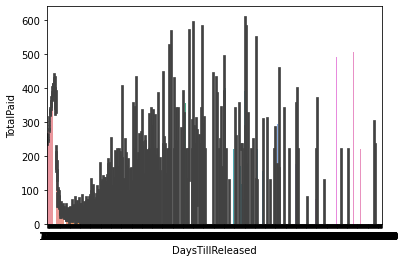

In [40]:
sns.barplot(x = dfDropped['DaysTillReleased'],y = dfDropped['TotalPaid'])

## 3.6) Barplot of Types of Cars

Here we can draw a barplot to see which type of car was towed the most and how many of each type was towed.

<AxesSubplot:>

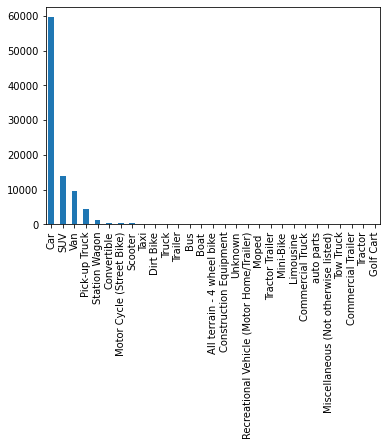

In [41]:
dfDropped['VehicleType'].value_counts().plot(kind='bar')

## 3.7) Barplot of VehicleType vs TotalPaid

Here we can make a barplot to show what was the average TotalPaid for each VehicleType 

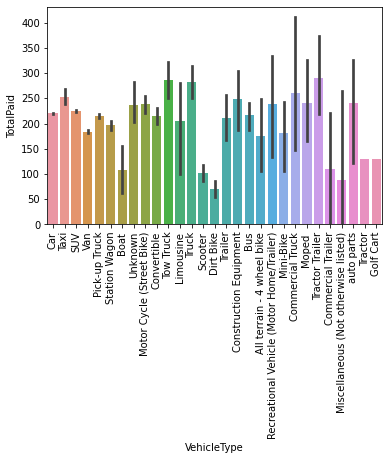

In [42]:
ax = sns.barplot(x="VehicleType", y="TotalPaid", data=dfDropped)
ax.tick_params(axis='x', rotation=90)